In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('planets.csv')
df.head()

,Unnamed: 0,質量,周期,偏心率
0,1,0.120,4.950,0.00
1,2,0.197,3.971,0.00
2,3,0.210,44.280,0.34
3,4,0.220,75.800,0.28
4,5,0.230,6.403,0.08


In [4]:
def label_mass(mass):
    if 0 <= mass < 1:
        return 0
    elif 1 <= mass < 5:
        return 1
    elif 5 <= mass :
        return 2
    else:
        return np.nan  # 範囲外の場合はNaN

In [5]:
x=df[['質量','周期']]
y=df['質量'].apply(label_mass)
print(x)
print(y)

         質量           周期
0     0.120     4.950000
1     0.197     3.971000
2     0.210    44.280000
3     0.220    75.800000
4     0.230     6.403000
..      ...          ...
96   11.300  2189.000000
97   11.980  1209.000000
98   14.400     8.428198
99   16.900  1739.500000
100  17.500   256.030000

[101 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
96     2
97     2
98     2
99     2
100    2
Name: 質量, Length: 101, dtype: int64


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.47619047619047616


Accuracy: 0.0


/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36074 (\N{CJK UNIFIED IDEOGRAPH-8CEA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3732

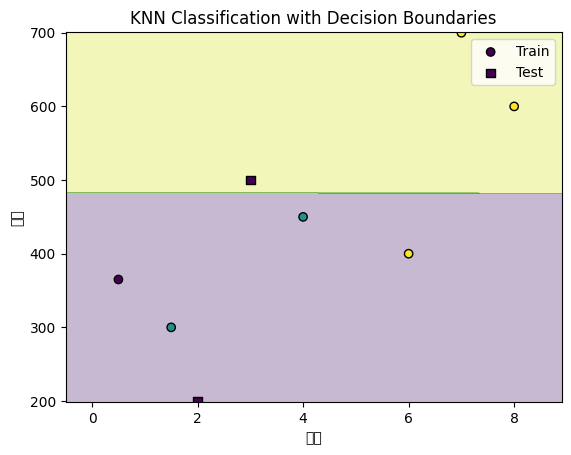

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# 特徴量とラベルの分割
x = df[['質量', '周期']]
y = df['ラベル']

# データの分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# KNNモデルの作成
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

# 予測
y_pred = model.predict(x_test)

# 精度の評価
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# 決定境界の可視化
# メッシュグリッドの作成
h = 0.1  # メッシュのサイズ
x_min, x_max = x['質量'].min() - 1, x['質量'].max() + 1
y_min, y_max = x['周期'].min() - 1, x['周期'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# モデルの予測を実行
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 決定境界をプロット
plt.contourf(xx, yy, Z, alpha=0.3)

# トレーニングデータとテストデータをプロット
plt.scatter(x_train['質量'], x_train['周期'], c=y_train, marker='o', label='Train', edgecolor='k')
plt.scatter(x_test['質量'], x_test['周期'], c=y_test, marker='s', label='Test', edgecolor='k')

plt.xlabel('質量')
plt.ylabel('周期')
plt.title('KNN Classification with Decision Boundaries')
plt.legend()
plt.show()


Accuracy: 0.47619047619047616


/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


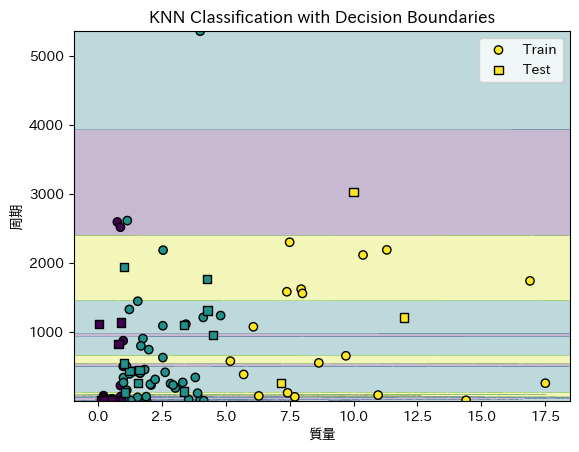

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from io import StringIO
import japanize_matplotlib

# データをCSV形式で定義
data = """\
"","質量","周期","偏心率"
"1",0.12,4.95,0
"2",0.197,3.971,0
"3",0.21,44.28,0.34
"4",0.22,75.8,0.28
"5",0.23,6.403,0.08
"6",0.25,3.024,0.02
"7",0.34,2.985,0.08
"8",0.4,10.901,0.498
"9",0.42,3.5097,0
"10",0.47,4.229,0
"11",0.48,3.487,0.05
"12",0.48,22.09,0.3
"13",0.54,3.097,0.01
"14",0.56,30.12,0.27
"15",0.68,4.617,0.02
"16",0.685,3.52433,0
"17",0.76,2594,0.1
"18",0.77,14.31,0.27
"19",0.81,828.95,0.04
"20",0.88,221.6,0.54
"21",0.88,2518,0.6
"22",0.89,64.62,0.13
"23",0.9,1136,0.33
"24",0.93,3.092,0
"25",0.93,14.66,0.03
"26",0.99,39.81,0.07
"27",0.99,500.73,0.1
"28",0.99,872.3,0.28
"29",1,337.11,0.38
"30",1,264.9,0.38
"31",1.01,540.4,0.52
"32",1.01,1942,0.4
"33",1.02,10.72,0.044
"34",1.05,119.6,0.35
"35",1.12,500,0.23
"36",1.13,154.8,0.31
"37",1.15,2614,0
"38",1.23,1326,0.14
"39",1.24,391,0.4
"40",1.24,435.6,0.45
"41",1.282,7.1262,0.134
"42",1.42,426,0.02
"43",1.55,51.61,0.649
"44",1.56,1444.5,0.2
"45",1.58,260,0.24
"46",1.63,444.6,0.41
"47",1.64,406,0.53
"48",1.65,401.1,0.36
"49",1.68,796.7,0.68
"50",1.76,903,0.2
"51",1.83,454,0.2
"52",1.89,61.02,0.1
"53",1.9,6.276,0.15
"54",1.99,743,0.62
"55",2.05,241.3,0.24
"56",0.05,1119,0.17
"57",2.08,228.52,0.304
"58",2.24,311.3,0.22
"59",2.54,1089,0.06
"60",2.54,627.34,0.06
"61",2.55,2185,0.18
"62",2.63,414,0.21
"63",2.84,250.5,0.19
"64",2.94,229.9,0.35
"65",3.03,186.9,0.41
"66",3.32,267.2,0.23
"67",3.36,1098,0.22
"68",3.37,133.71,0.511
"69",3.44,1112,0.52
"70",3.55,18.2,0.01
"71",3.81,340,0.36
"72",3.9,111.81,0.927
"73",4,15.78,0.046
"74",4,5360,0.16
"75",4.12,1209.9,0.65
"76",4.14,3.313,0.02
"77",4.27,1764,0.353
"78",4.29,1308.5,0.31
"79",4.5,951,0.45
"80",4.8,1237,0.515
"81",5.18,576,0.71
"82",5.7,383,0.07
"83",6.08,1074,0.011
"84",6.292,71.487,0.1243
"85",7.17,256,0.7
"86",7.39,1582,0.478
"87",7.42,116.7,0.4
"88",7.5,2300,0.395
"89",7.7,58.116,0.529
"90",7.95,1620,0.22
"91",8,1558,0.314
"92",8.64,550.65,0.71
"93",9.7,653.22,0.41
"94",10,3030,0.56
"95",10.37,2115.2,0.62
"96",10.96,84.03,0.33
"97",11.3,2189,0.34
"98",11.98,1209,0.37
"99",14.4,8.428198,0.277
"100",16.9,1739.5,0.228
"101",17.5,256.03,0.429
"""  # データを省略せずに全て記入

# CSV形式の文字列からDataFrameを作成
df = pd.read_csv(StringIO(data))

# 質量に基づいてラベルを作成
def label_mass(mass):
    if mass < 1:
        return 0
    elif mass < 5:
        return 1
    else:
        return 2

df['ラベル'] = df['質量'].apply(label_mass)

# 特徴量とラベルの分割
x = df[['質量', '周期']]
y = df['ラベル']

# データの分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# KNNモデルの作成
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

# 予測
y_pred = model.predict(x_test)

# 精度の評価
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# 決定境界の可視化
# メッシュグリッドの作成
h = 0.1  # メッシュのサイズ
x_min, x_max = x['質量'].min() - 1, x['質量'].max() + 1
y_min, y_max = x['周期'].min() - 1, x['周期'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# モデルの予測を実行
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 決定境界をプロット
plt.contourf(xx, yy, Z, alpha=0.3)

# トレーニングデータとテストデータをプロット
plt.scatter(x_train['質量'], x_train['周期'], c=y_train, marker='o', label='Train', edgecolor='k')
plt.scatter(x_test['質量'], x_test['周期'], c=y_test, marker='s', label='Test', edgecolor='k')

plt.xlabel('質量')
plt.ylabel('周期')
plt.title('KNN Classification with Decision Boundaries')
plt.legend()
plt.show()
